<a href="https://colab.research.google.com/github/LakshmiSrivastava/DSML-Aug-2023/blob/main/JamboreeLinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Jamboree Education - Linear Regression**


**Motto:**
"Transforming Careers, Transforming Lives"

**Vision**
To ensure that students achieve success in their careers by giving them the best possible training and expertise on exams and counseling related to education abroad. In this process, Jamboree team members achieve a sense of purpose and accomplishment.

Jamboree, known for its thorough research and professionalism, is a one-stop shop for education abroad.Jamboree makes the entire process of studying abroad, from preparing to joining a foreign university, a smooth process. In recent years, the inclusion of several value-added services such as discounted couriers, educational loans, and pre-departure orientation has made Jamboree Education a one-stop solution center for all your study abroad requirements.

Jamboree has helped thousands of students like you make it to top colleges abroad. Be it GMAT, GRE or SAT, their unique problem-solving methods ensure maximum scores with minimum effort.They recently launched a feature where students/learners can come to their website and check their probability of getting into the IVY league college. This feature estimates the chances of graduate admission from an Indian perspective.
How can you help here?
Your analysis will help Jamboree in understanding what factors are important in graduate admissions and how these factors are interrelated among themselves. It will also help predict one's chances of admission given the rest of the variables.


**Column Profiling:**

·	Serial No. (Unique row ID)
·	GRE Scores (out of 340)
·	TOEFL Scores (out of 120)
·	University Rating (out of 5)
·	Statement of Purpose and Letter of Recommendation Strength (out of 5)
·	Undergraduate GPA (out of 10)
·	Research Experience (either 0 or 1)
·	Chance of Admit (ranging from 0 to 1)

**Concept Used:**
·	Exploratory Data Analysis
·	Linear Regression

**Problems to solve:**

	1. Import the dataset and do usual exploratory data analysis steps like checking the structure & characteristics of the dataset.
	2. Drop the unique row Identifier . This step is important as model to build some understanding based on row numbers.
	3. Use Non-graphical and graphical analysis for getting inferences about variables.
	4. This can be done by checking the distribution of variables of graduate applicants.
	5. The students with varied merit apply for the university, understanding the relationship between different factors responsible for graduate admissions.
	6. Check correlation among independent variables and how they interact with each other.
	7. Use Linear Regression from (Statsmodel library) and explain the results.
		Test the assumptions of linear regression:
		Multicollinearity check by VIF score
		Mean of residuals
		Linearity of variables (no pattern in residual plot)
		Test for Homoscedasticity
		Normality of residuals
	8. model evaluation- MAE, RMSE, R2 score, Adjusted R2.
	9. actionable Insights & Recommendations
	10. Trying different Linear Regressions


In [ ]:
import numpy as np
import pandas as pd
import seaborn as san
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error, adjusted_mutual_info_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import scipy.stats as stats


In [ ]:
df=pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/839/original/Jamboree_Admission.csv')

In [ ]:
df.head(10)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
5,6,330,115,5,4.5,3.0,9.34,1,0.90
6,7,321,109,3,3.0,4.0,8.20,1,0.75
7,8,308,101,2,3.0,4.0,7.90,0,0.68
8,9,302,102,1,2.0,1.5,8.00,0,0.50
9,10,323,108,3,3.5,3.0,8.60,0,0.45


**Insight**: Here GRE Score	TOEFL Score	University Rating	SOP(Statement of Purpose(out of 5))	LOR(Letter of Recommendation Strength(out of 5))	CGPA(Undergraduate GPA(out of 10))	Research(Research Experience(either 0 or 1)) are fetures/input and  Chance of Admit University Rating (ranging from 0 to 1) is target variable ·

**Observations on shape of data**

In [ ]:
df.shape

(500, 9)

Insight: There are 500 rows and 9 columns.

**data types of all the attributes**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


Insight: **There is no null values** because all 500 rows have all columns with non null. SOP, LOR,CGPA and Chance of Admit are float and rest are integers, where Serial number are uniquely representing the each datapoint. Here Reasearh feature can change into categorical datatype with 'Yes' and 'No' reseach experience.



**Data cleaning:**

1. There is no dependency of Serial No. while prdicting target variable ie. 'Chance of Admit', so need to drop it to find linear regression line.
2. also need to separate target variable from dependent variables.

In [ ]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

There is one unneccesory space at the end in column name 'Chance of Admit ' and 'LOR '
Need to remove it.

---



In [ ]:
df=df.rename(columns= {'Chance of Admit ':'Chance of Admit', 'LOR ':'LOR'})
df.head(5)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


**Checking for duplicate values:**

In [ ]:
df.duplicated().sum()

0

No duplicate datapoint.

**Checking for null values:**

In [ ]:
df.isna().sum()/len(df)

Serial No.           0.0
GRE Score            0.0
TOEFL Score          0.0
University Rating    0.0
SOP                  0.0
LOR                  0.0
CGPA                 0.0
Research             0.0
Chance of Admit      0.0
dtype: float64

No null values.

**statistical summary**

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Serial No.,500.0,250.50000,144.481833,1.00,125.7500,250.50,375.25,500.00
GRE Score,500.0,316.47200,11.295148,290.00,308.0000,317.00,325.00,340.00
TOEFL Score,500.0,107.19200,6.081868,92.00,103.0000,107.00,112.00,120.00
University Rating,500.0,3.11400,1.143512,1.00,2.0000,3.00,4.00,5.00
SOP,500.0,3.37400,0.991004,1.00,2.5000,3.50,4.00,5.00
LOR,500.0,3.48400,0.925450,1.00,3.0000,3.50,4.00,5.00
CGPA,500.0,8.57644,0.604813,6.80,8.1275,8.56,9.04,9.92
Research,500.0,0.56000,0.496884,0.00,0.0000,1.00,1.00,1.00
Chance of Admit,500.0,0.72174,0.141140,0.34,0.6300,0.72,0.82,0.97


**Insight**: Mean of GRE and TOFL score are 316(92%) and 107(89%) and max is 340 and 120 toal score. Standard Deviation are less as mean value and 50 percentile are almost close for SOP,LOR and CGPA value. Research has also .56 mean value having maximum 1(research experience =yes), doesnt has a big impact.

Seems that high score in GRE and TOFEL has more chance in admission.

**Unique Values of every features:**

In [ ]:
df.nunique()

Serial No.           500
GRE Score             49
TOEFL Score           29
University Rating      5
SOP                    9
LOR                    9
CGPA                 184
Research               2
Chance of Admit       61
dtype: int64

Datatypes:There are less unique values in University Rating(5), SOP(9),
LOR(9) and Research(2) so they are categorical variables and GRE Score(49),
TOEFL Score(29), CGPA(184) .

**categorical**=['University Rating','SOP','LOR', 'Research']

**continuous**=['GRE Score','TOEFL Score','CGPA']

**target**=['Chance of Admit']

GRE Score, TOFEL Score are numerical but converted into categorical by creating bins.


**Univariate Analysis (distribution plots of all the continuous variable(s) barplots/countplots of all the categorical variables)**

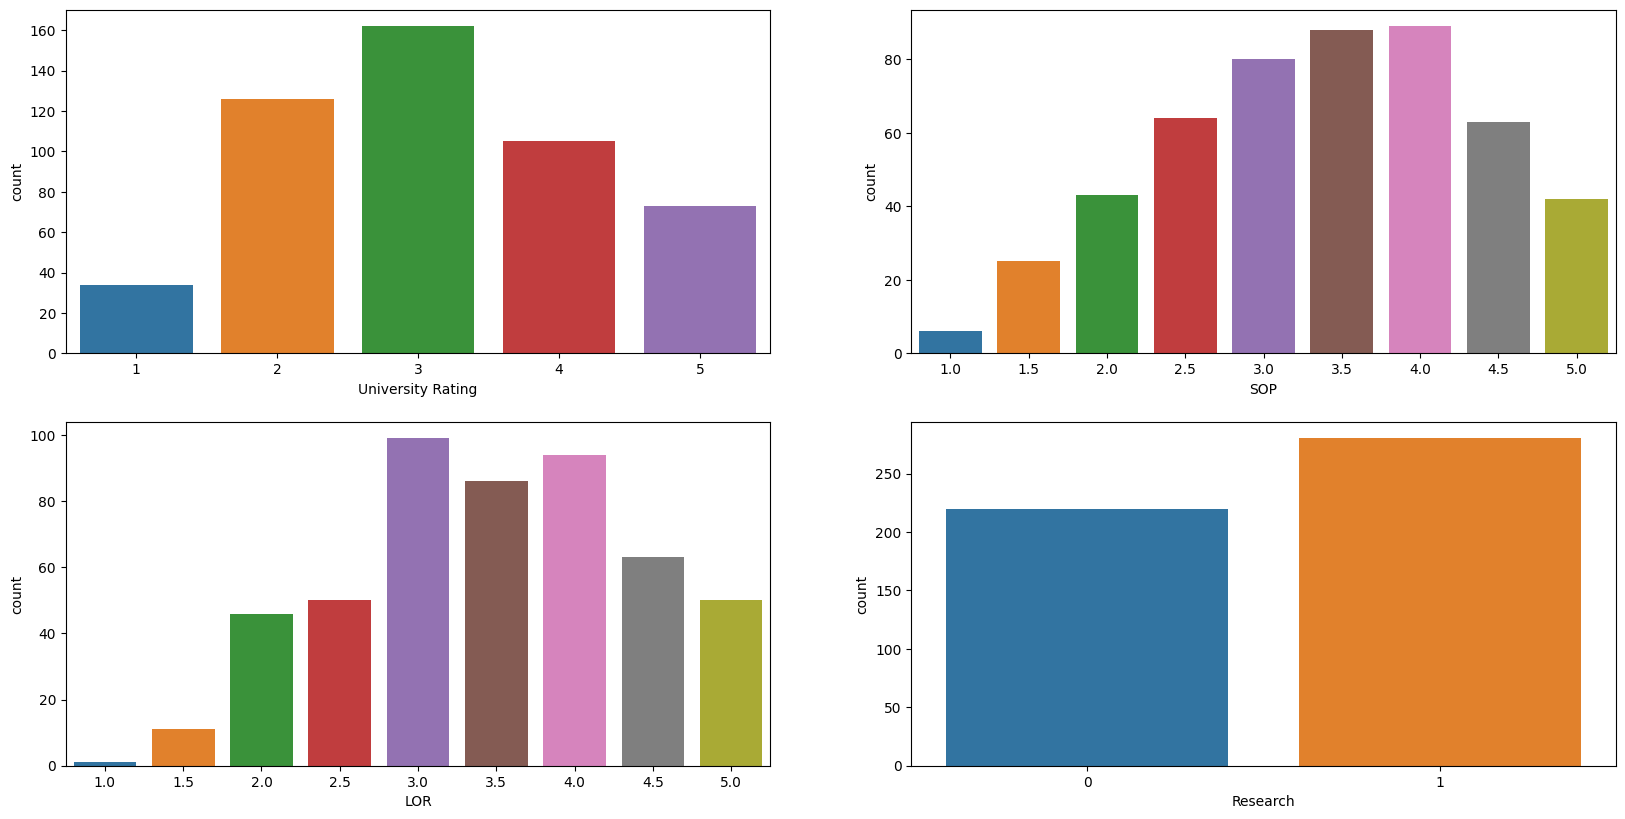

3    162
2    126
4    105
5     73
1     34
Name: University Rating, dtype: int64

4.0    89
3.5    88
3.0    80
2.5    64
4.5    63
2.0    43
5.0    42
1.5    25
1.0     6
Name: SOP, dtype: int64

3.0    99
4.0    94
3.5    86
4.5    63
2.5    50
5.0    50
2.0    46
1.5    11
1.0     1
Name: LOR, dtype: int64

1    280
0    220
Name: Research, dtype: int64



In [ ]:
cols=['University Rating','SOP','LOR', 'Research']

f,a=plt.subplots(nrows=2, ncols=2, figsize=(20,4))
i=0
f.subplots_adjust(top=2)
for row in range(2):
  for col in range(2):
    san.countplot(data=df, x=cols[i],ax=a[row,col])
    plt.xlabel(cols[i])
    i+=1
plt.show()
i=0
for row in range(2):
  for col in range(2):
    print(df[cols[i]].value_counts())
    print()
    i+=1


**Insight:**
1. Both numerically and visually is showed that University rating 3 has highest admission(162) and 5 and 1 ratings has less admission.-Shows normal distribution of data according to university ratings.
2. SOP with 4.0,3.5 and 3.0 has almost double likelihood of getting admission than 2.0 and 5.0 and the least chance of admission is 1.0., shows left skwed distribution.
3. LOR with highest chance of admission at 3.0,4.0,3.5 ratings and 1.0 has the least only 1.
4. Research experience has a slight higher chance of admission.



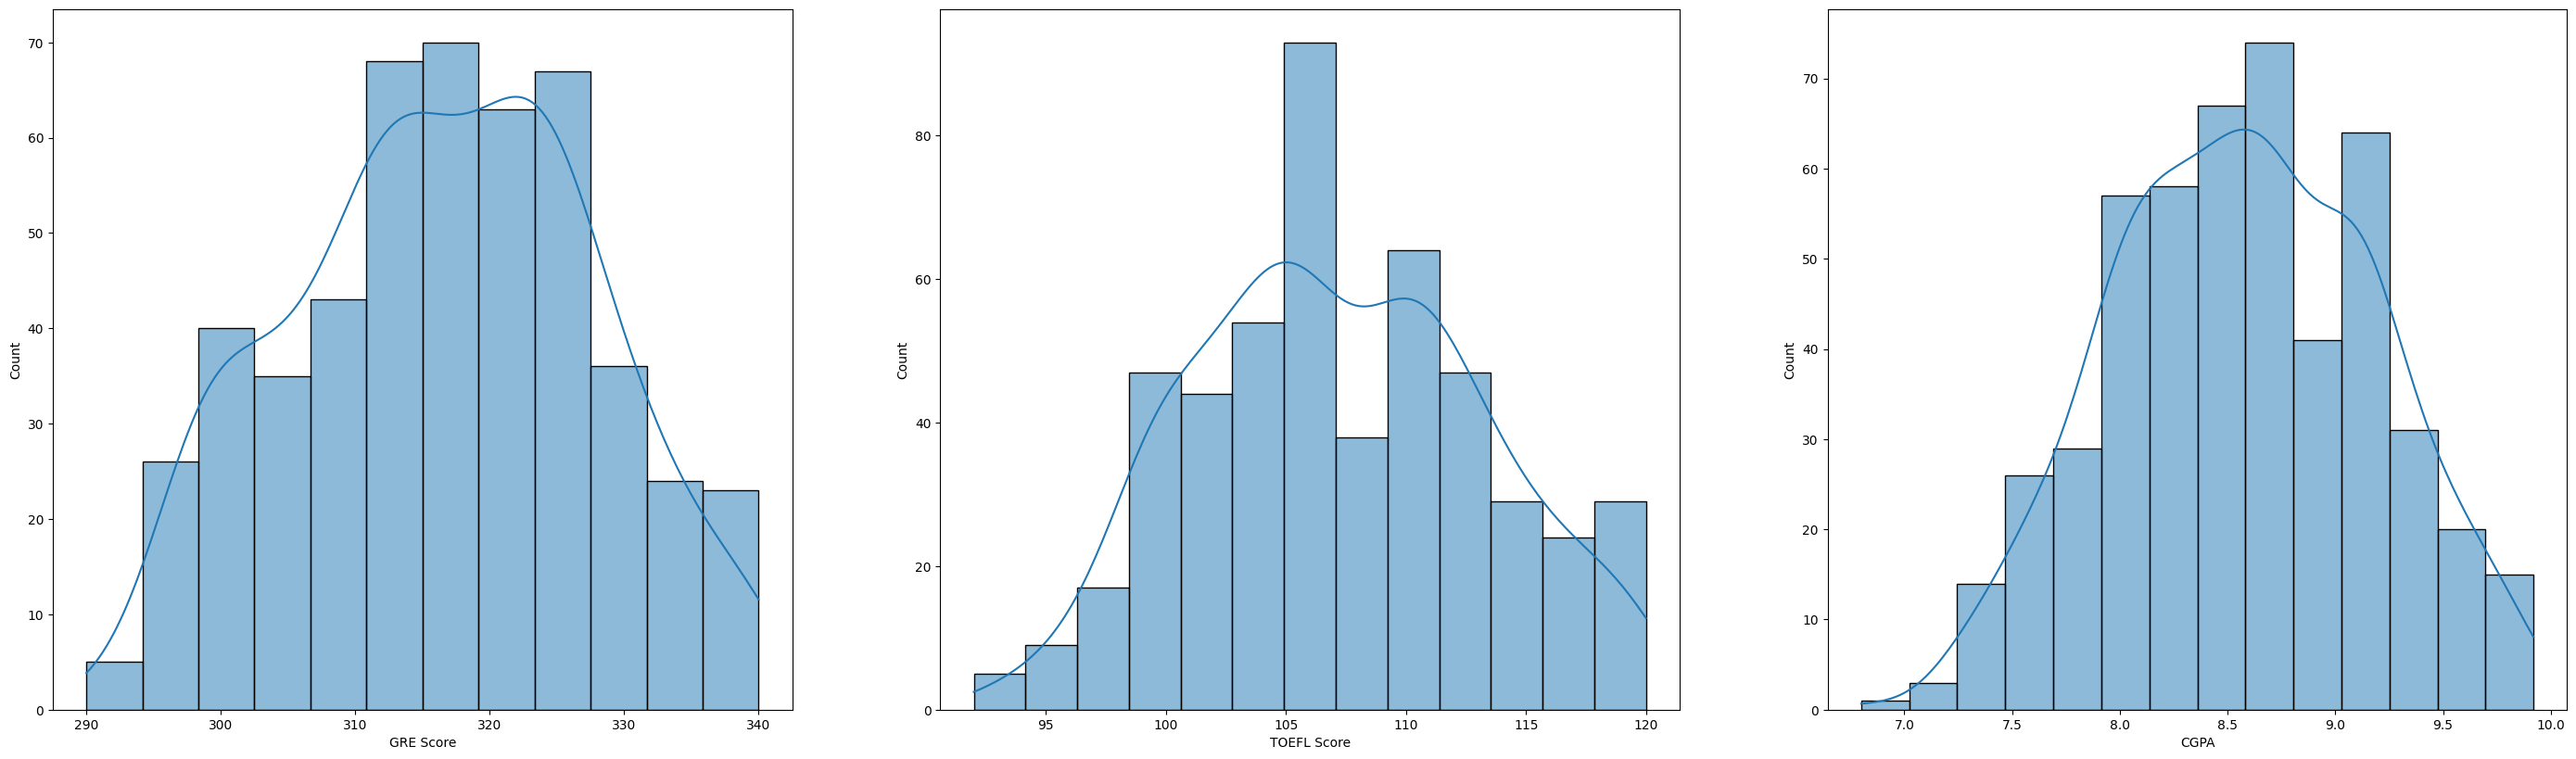

In [ ]:
nCols=['GRE Score','TOEFL Score','CGPA']
f,a=plt.subplots(ncols=3, figsize=(35,4))

f.subplots_adjust(top=2)

for i in range(3):
  san.histplot(data=df,x=nCols[i], kde=True,ax=a[i])

plt.show()



**Insight:**
1. the most numbers of  GRE score is between 311 to 327.
2. The most nummbers of datapoints have TOFEL score 105 to 107.
3. And the most numbers of data points have CGPA score 8.6 to 8.7

Average score has more chance and willings of admission.

**Bivariate analysis:**

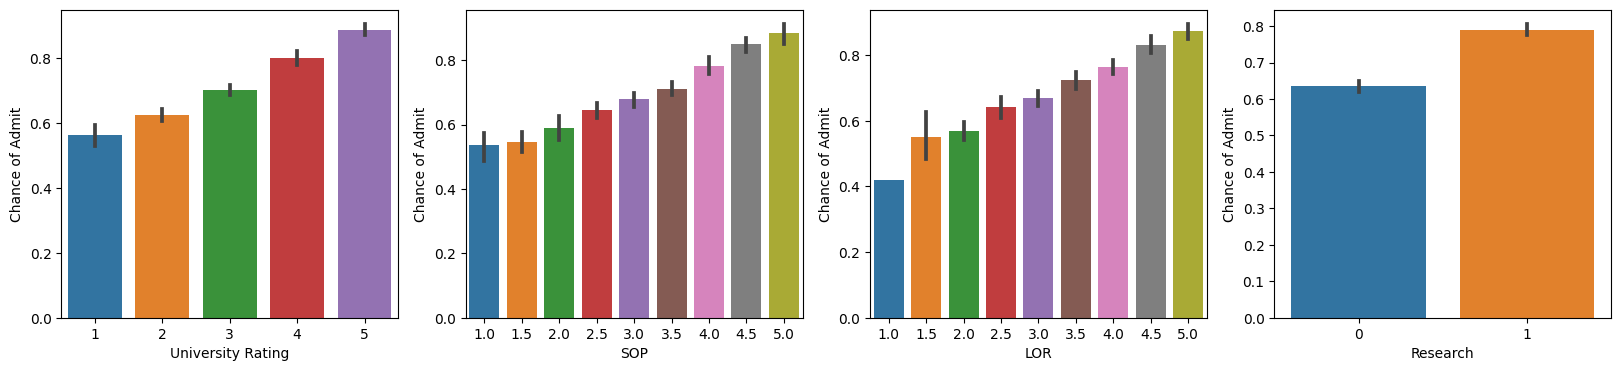

In [ ]:
cCols=['University Rating','SOP','LOR', 'Research']
f,a=plt.subplots(ncols=4, figsize=(20,4))
for i in range(4):
  san.barplot(data=df, x=cCols[i], y='Chance of Admit', ax=a[i])
  plt.xlabel(cCols[i])
plt.show()

**Insight:**
1. University rating 5 has higher chance of admit and gradually decreases with least chance with rating 1.
2. similarly SOP and LOR with high point(5) has greater chance than 1.
3. Reearch experience enhance the oppertunity of admission.

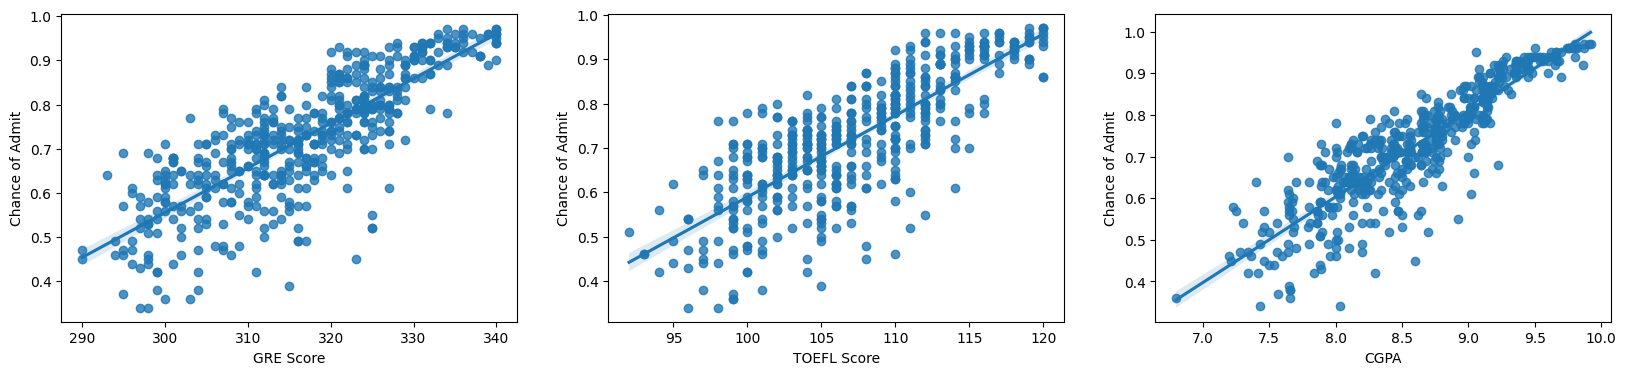

In [ ]:
nCols=['GRE Score','TOEFL Score','CGPA']

f,a=plt.subplots(ncols=3, figsize=(20,4))
for i in range(3):
  san.regplot(data=df, x=nCols[i], y='Chance of Admit', ax=a[i])
  plt.xlabel(nCols[i])
plt.show()

**Insight**: continous variables GRE score, TOFEL scoe, CGPA are in positive linearity.

**Checking of correlation (linearity and correlation between features) visualy**.

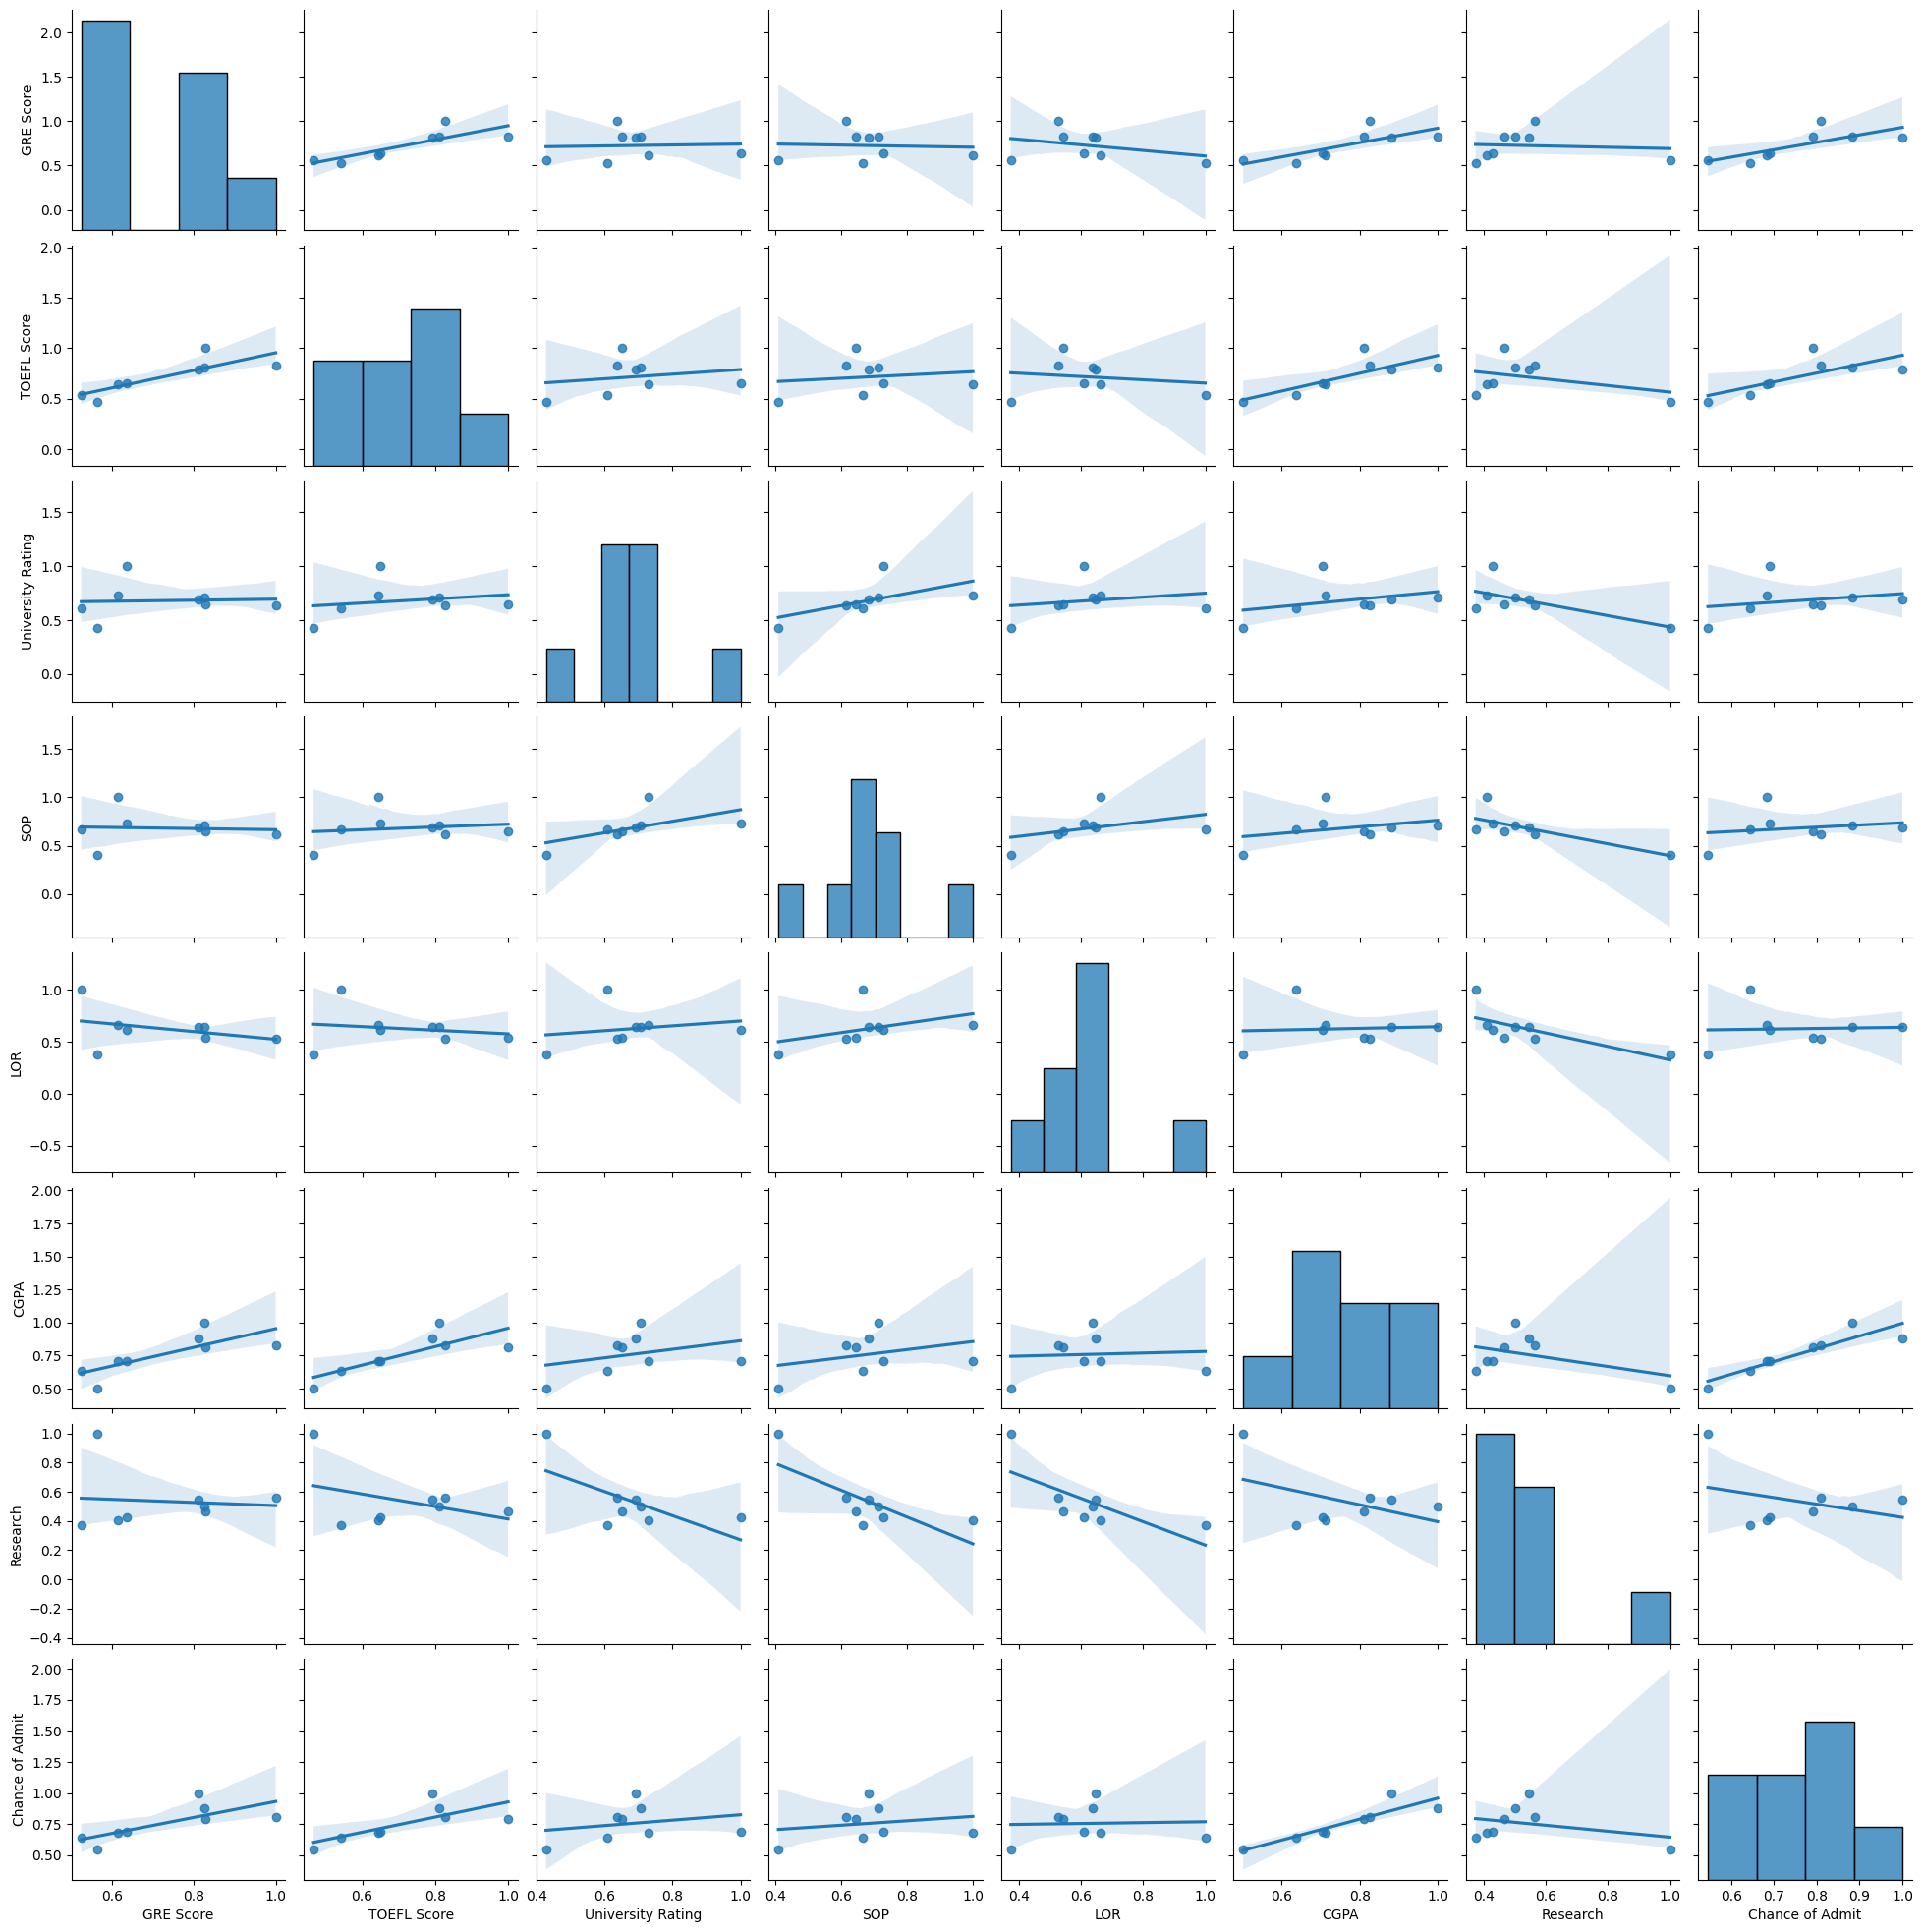

In [ ]:
san.pairplot(df.corr(),kind= 'reg')

**Insight:**
1. The dependent variable(chance of Admit) is increasing with the increase of independent variables(GRE score, TOFEL score, CGPA score.
2. University rating, SOP and LOR has also positively correlated but not very strongly.
3. Research has slight inverse impact on Chance of Admit but more strongly inversely proportion to TOFEL Score, University Rating, SOP, LOR and CGPA.
4. TOFL score and GRE score in positive linearity with each other.

<Axes: >

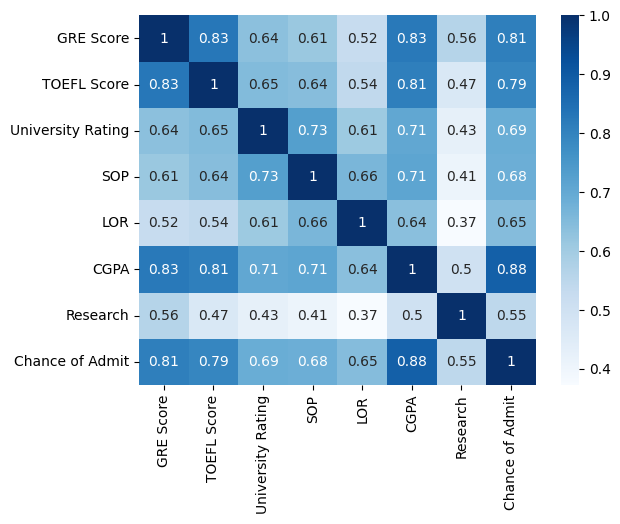

In [ ]:
san.heatmap(df.corr(),annot=True,cmap = "Blues")

**Insight**:
1. Chance of Admit is strongly dependent on CGPA(0.88%), GRE score(0.81%), TOFEL score(0.79%) and keep less weightage on University rating(0.69%), SOP(0.68%) and LOR(0.65%)
2. TOFEL score, CGPA and GRE score are strongly relateted to each other.

**Checking for outlier:**

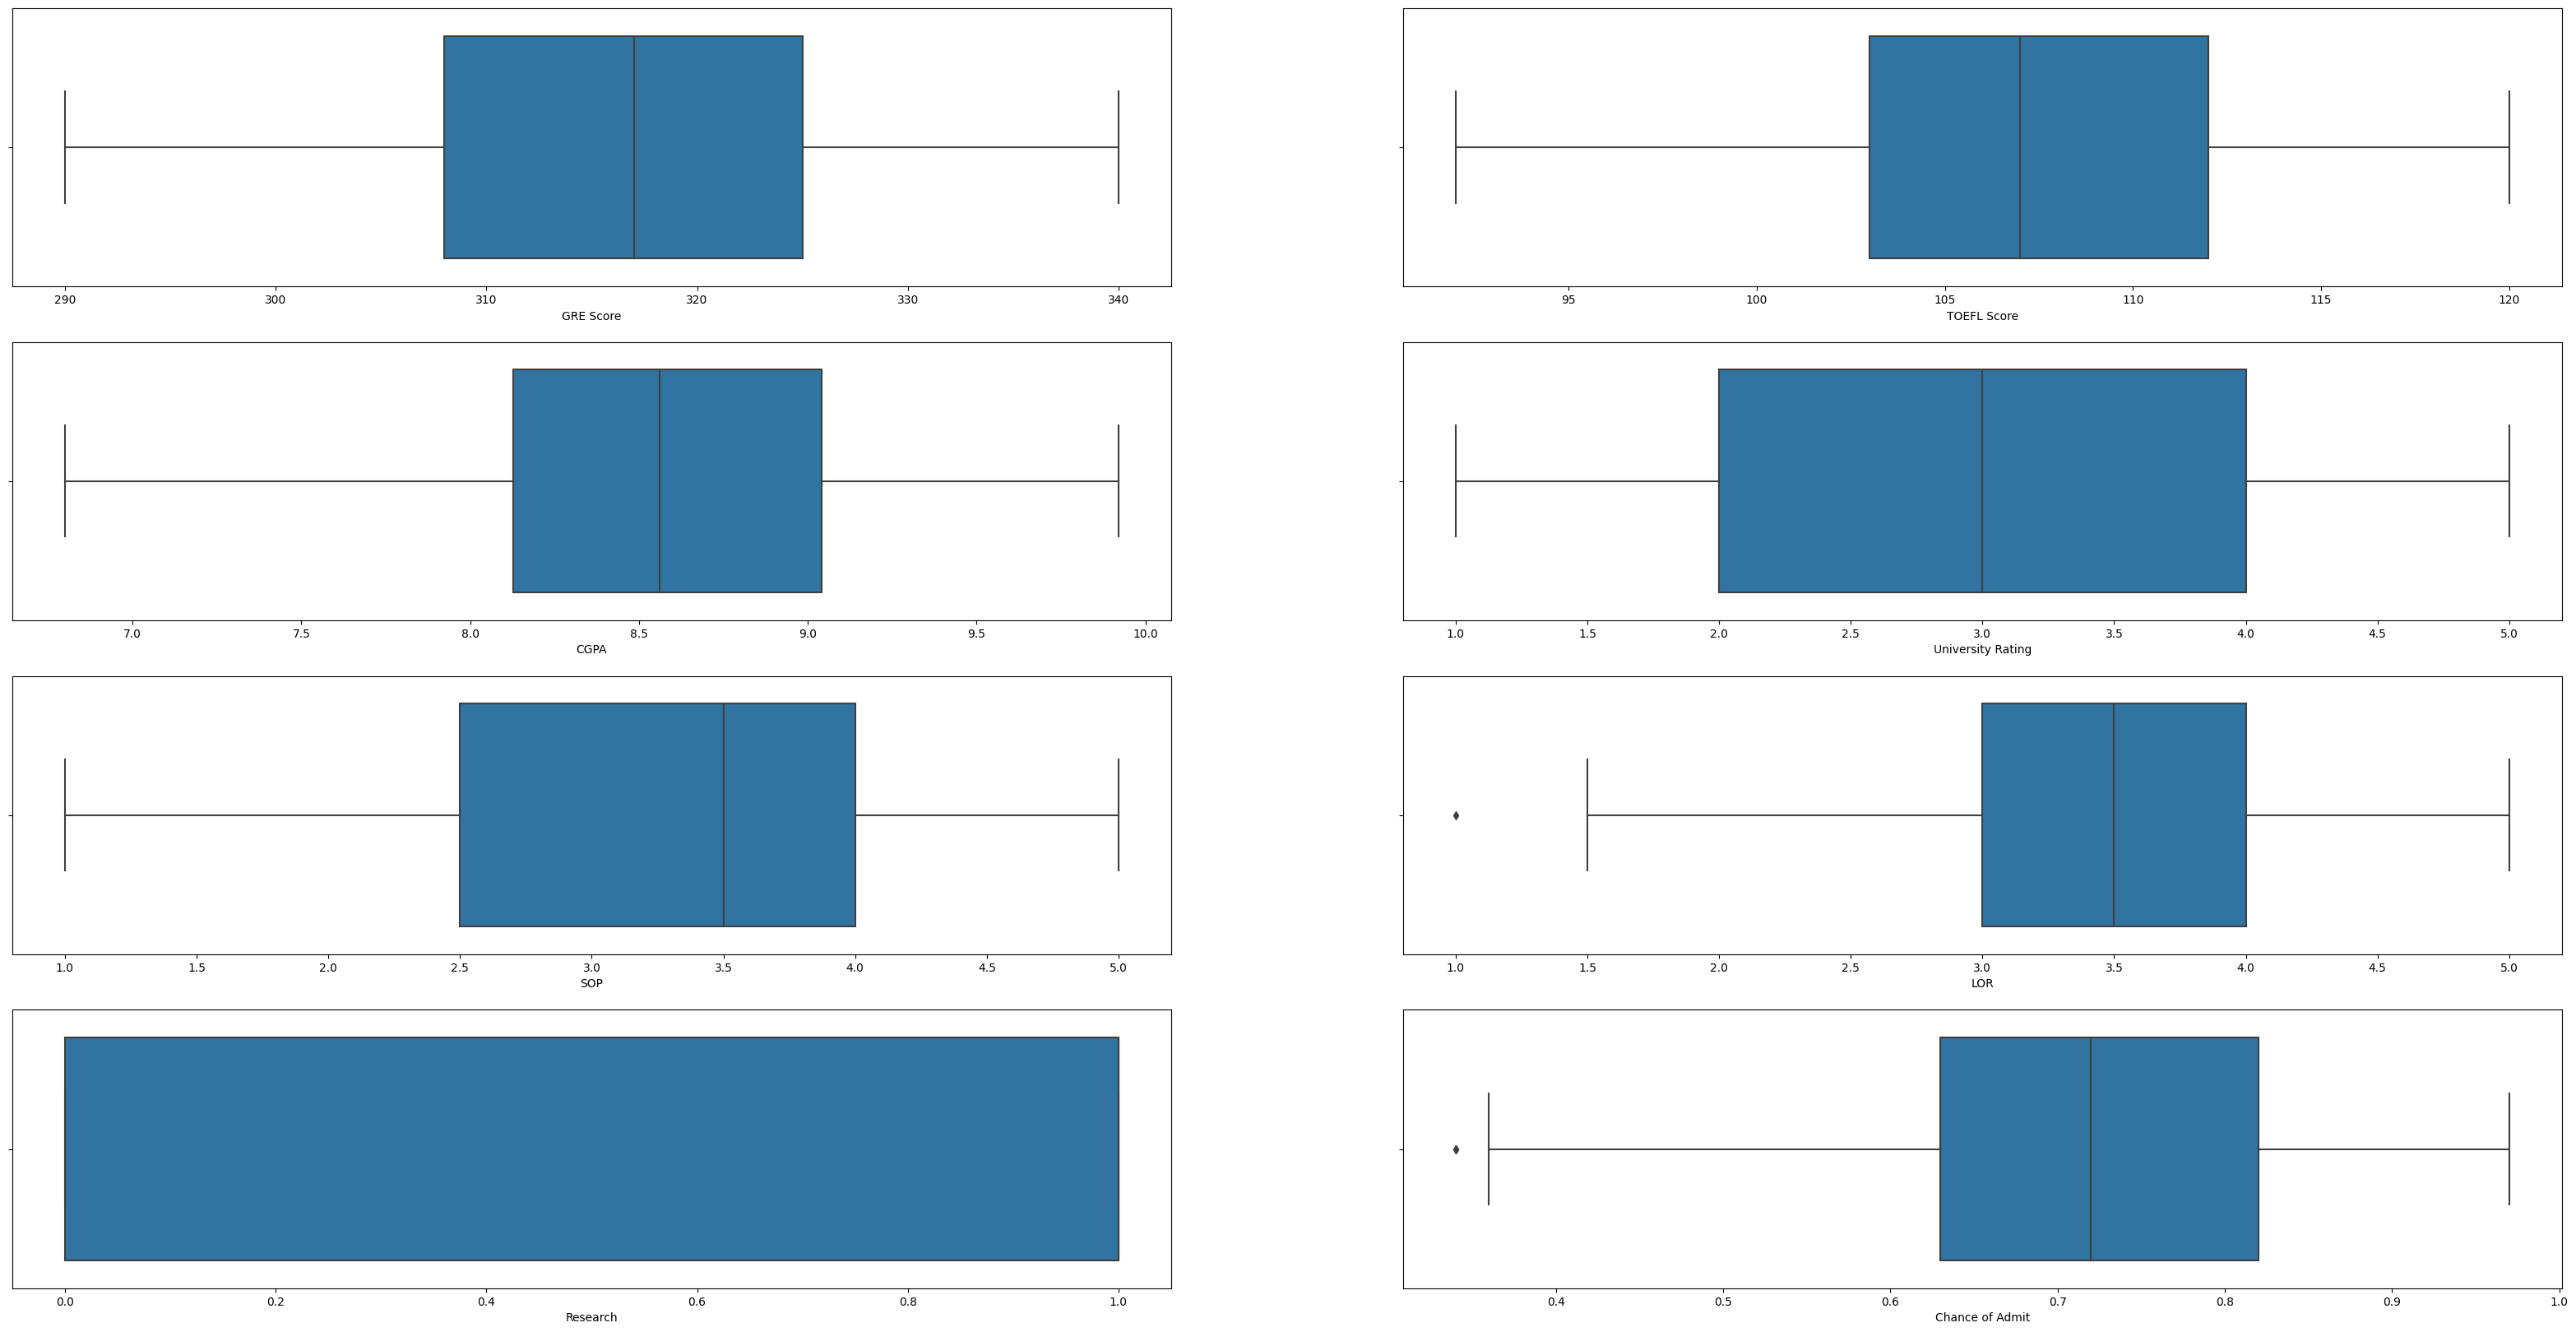

In [ ]:
cols=['GRE Score','TOEFL Score','CGPA', 'University Rating','SOP','LOR', 'Research', 'Chance of Admit']
f,a=plt.subplots(nrows=4, ncols=2, figsize=(40,4))
i=0
f.subplots_adjust(top=4)
for row in range(4):
  for col in range(2):
    san.boxplot(data=df, x=cols[i],ax=a[row,col])
    i+=1
plt.show()


**Insight:**
1. There are no outlier in any other columns except in LOR and Chance of Admit.

In [ ]:
cols=['GRE Score','TOEFL Score','CGPA', 'University Rating','SOP','LOR', 'Research', 'Chance of Admit']
for i in range(len(cols)):
  print("outlier in  " +cols[i] )
  IQR=np.percentile(df[cols[i]],75)-np.percentile(df[cols[i]],25)
  print("IQR : ",IQR)
  Q1=np.percentile(df[cols[i]],25)
  print('Q1 : ',Q1)
  Q3=np.percentile(df[cols[i]],75)
  print('Q3 : ', Q3)
  upperlimit=Q3+(IQR*1.5)
  print("upperlimit : ",upperlimit)
  lowerlimit=Q1-(IQR*1.5)
  print("lowerlimit : ",lowerlimit)
  outlier=df[(df[cols[i]]>upperlimit) |(df[cols[i]]<lowerlimit)]
  print("outlier in" +cols[i] +": ",len(outlier))
  print("*********************************************")
  i+=1

outlier in  GRE Score
IQR :  17.0
Q1 :  308.0
Q3 :  325.0
upperlimit :  350.5
lowerlimit :  282.5
outlier inGRE Score:  0
*********************************************
outlier in  TOEFL Score
IQR :  9.0
Q1 :  103.0
Q3 :  112.0
upperlimit :  125.5
lowerlimit :  89.5
outlier inTOEFL Score:  0
*********************************************
outlier in  CGPA
IQR :  0.9124999999999979
Q1 :  8.127500000000001
Q3 :  9.04
upperlimit :  10.408749999999996
lowerlimit :  6.7587500000000045
outlier inCGPA:  0
*********************************************
outlier in  University Rating
IQR :  2.0
Q1 :  2.0
Q3 :  4.0
upperlimit :  7.0
lowerlimit :  -1.0
outlier inUniversity Rating:  0
*********************************************
outlier in  SOP
IQR :  1.5
Q1 :  2.5
Q3 :  4.0
upperlimit :  6.25
lowerlimit :  0.25
outlier inSOP:  0
*********************************************
outlier in  LOR
IQR :  1.0
Q1 :  3.0
Q3 :  4.0
upperlimit :  5.5
lowerlimit :  1.5
outlier inLOR:  1
***************************

**Insight:**
1. There are no outlier in any other columns except in LOR(1) and Chance of Admit(2).

Data Preprossesing

**Outlier treatment:**


In [ ]:
cols=['LOR', 'Chance of Admit' ]

for i in range(2):
  Q1=df[cols[i]].quantile(0.25)
  Q3=df[cols[i]].quantile(0.75)
  IQR=Q3-Q1
  df = df[~((df[cols[i]] < (Q1 - 1.5 * IQR)) | (df[cols[i]] > (Q3 + 1.5 * IQR)))]
  df.reset_index(drop=True)
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


**Feature Engineering:**


Chance of Admit is target variable so for linear regression need to keep it aside.

In [ ]:
y=df[['Chance of Admit']]

In [ ]:
df=df.drop(['Serial No.', 'Chance of Admit'],axis=1)

In [ ]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA',
       'Research'],
      dtype='object')

**Standardising the dataset:**

In [ ]:
standardize=StandardScaler()
standardize.fit(df)
X=standardize.transform(df)
print(X)

[[ 1.81871873  1.78116055  0.76976077 ...  1.097138    1.77718755
   0.88034084]
 [ 0.66066791 -0.04304416  0.76976077 ...  1.097138    0.47883554
   0.88034084]
 [-0.05197876 -0.54055453 -0.10769589 ...  0.00767229 -0.96932631
   0.88034084]
 ...
 [ 1.1951529   2.11283414  1.64721742 ...  1.64187086  1.62737771
   0.88034084]
 [-0.40830209 -0.70639132  0.76976077 ...  1.64187086 -0.25356815
  -1.13592367]
 [ 0.9279104   0.95197659  0.76976077 ...  1.097138    0.7618097
  -1.13592367]]


**Building Linear Regression:**

**Spliting data into train and test data:**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


(397, 7) (397, 1)
(100, 7) (100, 1)


**Model building**
**the Linear Regression model**
**Matrix performances mean squared error matrix, Resude mean squared error matrix, Resude mean squared error matrix,  r2score matrix, adjusted r2score matrix.**

In [ ]:
# training LinearRegression model
LinearRegression = LinearRegression()
LinearRegression.fit(X_train,y_train)

#All the feature's coeffecient and intercept
line_df = pd.DataFrame(LinearRegression.coef_.reshape(1,-1),columns=df.columns[:])
line_df["Intercept"] = LinearRegression.intercept_
print(line_df)

#prediction of target variable
y_pred_test = LinearRegression.predict(X_test)
y_pred_train = LinearRegression.predict(X_train)

#Matrix performances
def AdjustedR2score(R2,n,d):
    return 1-(((1-R2)*(n-1))/(n-d-1))

print(f"\n----   Liner Regression Model  ----\n")
print(f"Train MAE: {np.round(mean_squared_error(y_train,y_pred_train),2)} Test MAE: {np.round(mean_squared_error(y_test,y_pred_test),2)}")  # mean squared error matrix
print(f"Train RMSE: {np.round(np.sqrt(mean_squared_error(y_train,y_pred_train)),2)} Test RMSE: {np.round(np.sqrt(mean_squared_error(y_test,y_pred_test)),2)}") #Resude mean squared error matrix
print(f"Train MAE: {np.round(mean_absolute_error(y_train,y_pred_train),2)} Test MAE: {np.round(mean_absolute_error(y_test,y_pred_test),2)}")  # Resude mean squared error matrix
print(f"Train r2_score: {np.round(r2_score(y_train,y_pred_train),2)} Test r2_score: {np.round(r2_score(y_test,y_pred_test),2)}") # r2score matrix
print(f"Train Adjusted_R2: {np.round(AdjustedR2score(r2_score(y_train,y_pred_train),len(X),X.shape[1]),2)} Test Adjusted_R2: {np.round(AdjustedR2score(r2_score(y_test,y_pred_test),len(X),X.shape[1]),2)}") # adjusted R2 score matrix


   GRE Score  TOEFL Score  University Rating       SOP      LOR      CGPA  \
0   0.018565     0.018055           0.006341  0.003587  0.01529  0.072243   

   Research  Intercept  
0  0.010958    0.72332  

----   Liner Regression Model  ----

Train MAE: 0.0 Test MAE: 0.0
Train RMSE: 0.06 Test RMSE: 0.06
Train MAE: 0.04 Test MAE: 0.04
Train r2_score: 0.82 Test r2_score: 0.82
Train Adjusted_R2: 0.82 Test Adjusted_R2: 0.81


**Insight:**
 All the matrix gives very close result on train and test data.

In [ ]:
df.columns[:]

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA',
       'Research'],
      dtype='object')

**Lasso Regression model**

**Matrix performances mean squared error matrix, Resude mean squared error matrix, Resude mean squared error matrix,  r2score matrix, adjusted r2score matrix.**

In [ ]:
# training LassoRegression model
Lasso = Lasso(alpha=0.001)
Lasso.fit(X_train , y_train)

#Lasso R2 Score calculation
trainR2 = Lasso.score(X_train,y_train)
testR2 = Lasso.score(X_test,y_test)
print(trainR2)
print(testR2)

#All the feature's coeffecient and intercept of Lasso model
Lasso_Model_coefs = pd.DataFrame(Lasso.coef_.reshape(1,-1),columns=df.columns[:])
Lasso_Model_coefs["Intercept"] = Lasso.intercept_
print(Lasso_Model_coefs)

#prediction of target variable
y_pred_testL = Lasso.predict(X_test)
y_pred_trainL = Lasso.predict(X_train)

#Error and performance matrix
print(f"\n----   Lasso Regression Model  ----\n")
print(f"Train MAE: {np.round(mean_squared_error(y_train,y_pred_trainL),2)} Test MAE: {np.round(mean_squared_error(y_test,y_pred_testL),2)}")  # mean squared error matrix
print(f"Train RMSE: {np.round(np.sqrt(mean_squared_error(y_train,y_pred_trainL)),2)} Test RMSE: {np.round(np.sqrt(mean_squared_error(y_test,y_pred_testL)),2)}") #Resude mean squared error matrix
print(f"Train MAE: {np.round(mean_absolute_error(y_train,y_pred_trainL),2)} Test MAE: {np.round(mean_absolute_error(y_test,y_pred_testL),2)}")  # mean absolute error matrix
print(f"Train r2_score: {np.round(r2_score(y_train,y_pred_trainL),2)} Test r2_score: {np.round(r2_score(y_test,y_pred_testL),2)}") # r2score matrix
print(f"Train Adjusted_R2: {np.round(AdjustedR2score(r2_score(y_train,y_pred_trainL),len(X),X.shape[1]),2)} Test Adjusted_R2: {np.round(AdjustedR2score(r2_score(y_test,y_pred_testL),len(X),X.shape[1]),2)}") # adjusted R2 score matrix


0.8233219486356557
0.816230802155321
   GRE Score  TOEFL Score  University Rating       SOP       LOR      CGPA  \
0   0.018481     0.017699           0.006109  0.003412  0.014865  0.072431   

   Research  Intercept  
0   0.01041   0.723301  

----   Lasso Regression Model  ----

Train MAE: 0.0 Test MAE: 0.0
Train RMSE: 0.06 Test RMSE: 0.06
Train MAE: 0.04 Test MAE: 0.04
Train r2_score: 0.82 Test r2_score: 0.82
Train Adjusted_R2: 0.82 Test Adjusted_R2: 0.81


**Ridge Regression model**

**Matrix performances mean squared error matrix, Resude mean squared error matrix, Resude mean squared error matrix,  r2score matrix, adjusted r2score matrix.**

In [ ]:
# training RidgeRegression model
Ridge = Ridge(alpha=0.001)
Ridge.fit(X_train , y_train)

#Ridge R2 Score calculation
trainR2_R = Ridge.score(X_train,y_train)
testR2_R = Lasso.score(X_test,y_test)
print(trainR2_R)
print(testR2_R)

#All the feature's coeffecient and intercept of Lasso model
Ridge_Model_coefs = pd.DataFrame(Ridge.coef_.reshape(1,-1),columns=df.columns[:])
Ridge_Model_coefs["Intercept"] = Ridge.intercept_
print(Ridge_Model_coefs)

#prediction of target variable
y_pred_testR = Ridge.predict(X_test)
y_pred_trainR = Ridge.predict(X_train)

#Error and performance matrix
print(f"\n----   Ridge Regression Model  ----\n")
print(f"Train MAE: {np.round(mean_squared_error(y_train,y_pred_trainR),2)} Test MAE: {np.round(mean_squared_error(y_test,y_pred_testR),2)}")  # mean squared error matrix
print(f"Train RMSE: {np.round(np.sqrt(mean_squared_error(y_train,y_pred_trainR)),2)} Test RMSE: {np.round(np.sqrt(mean_squared_error(y_test,y_pred_testR)),2)}") #Resude mean squared error matrix
print(f"Train MAE: {np.round(mean_absolute_error(y_train,y_pred_trainR),2)} Test MAE: {np.round(mean_absolute_error(y_test,y_pred_testR),2)}")  # mean absolute error matrix
print(f"Train r2_score: {np.round(r2_score(y_train,y_pred_trainR),2)} Test r2_score: {np.round(r2_score(y_test,y_pred_testR),2)}") # r2score matrix
print(f"Train Adjusted_R2: {np.round(AdjustedR2score(r2_score(y_train,y_pred_trainR),len(X),X.shape[1]),2)} Test Adjusted_R2: {np.round(AdjustedR2score(r2_score(y_test,y_pred_testR),len(X),X.shape[1]),2)}") # adjusted R2 score matrix


0.8234060990483565
0.816230802155321
   GRE Score  TOEFL Score  University Rating       SOP      LOR      CGPA  \
0   0.018565     0.018055           0.006341  0.003587  0.01529  0.072242   

   Research  Intercept  
0  0.010958    0.72332  

----   Ridge Regression Model  ----

Train MAE: 0.0 Test MAE: 0.0
Train RMSE: 0.06 Test RMSE: 0.06
Train MAE: 0.04 Test MAE: 0.04
Train r2_score: 0.82 Test r2_score: 0.82
Train Adjusted_R2: 0.82 Test Adjusted_R2: 0.81


**Assumptions of linear regression:**

Multicollinearity check by VIF score (variables are dropped one-by-one till none has VIF>5)

The mean of residuals is nearly zero

Linearity of variables (no pattern in the residual plot)

Test for Homoscedasticity

Normality of residuals (almost bell-shaped curve in residuals distribution, points in QQ plot are almost all on the line)




**Assumption of Linearity**

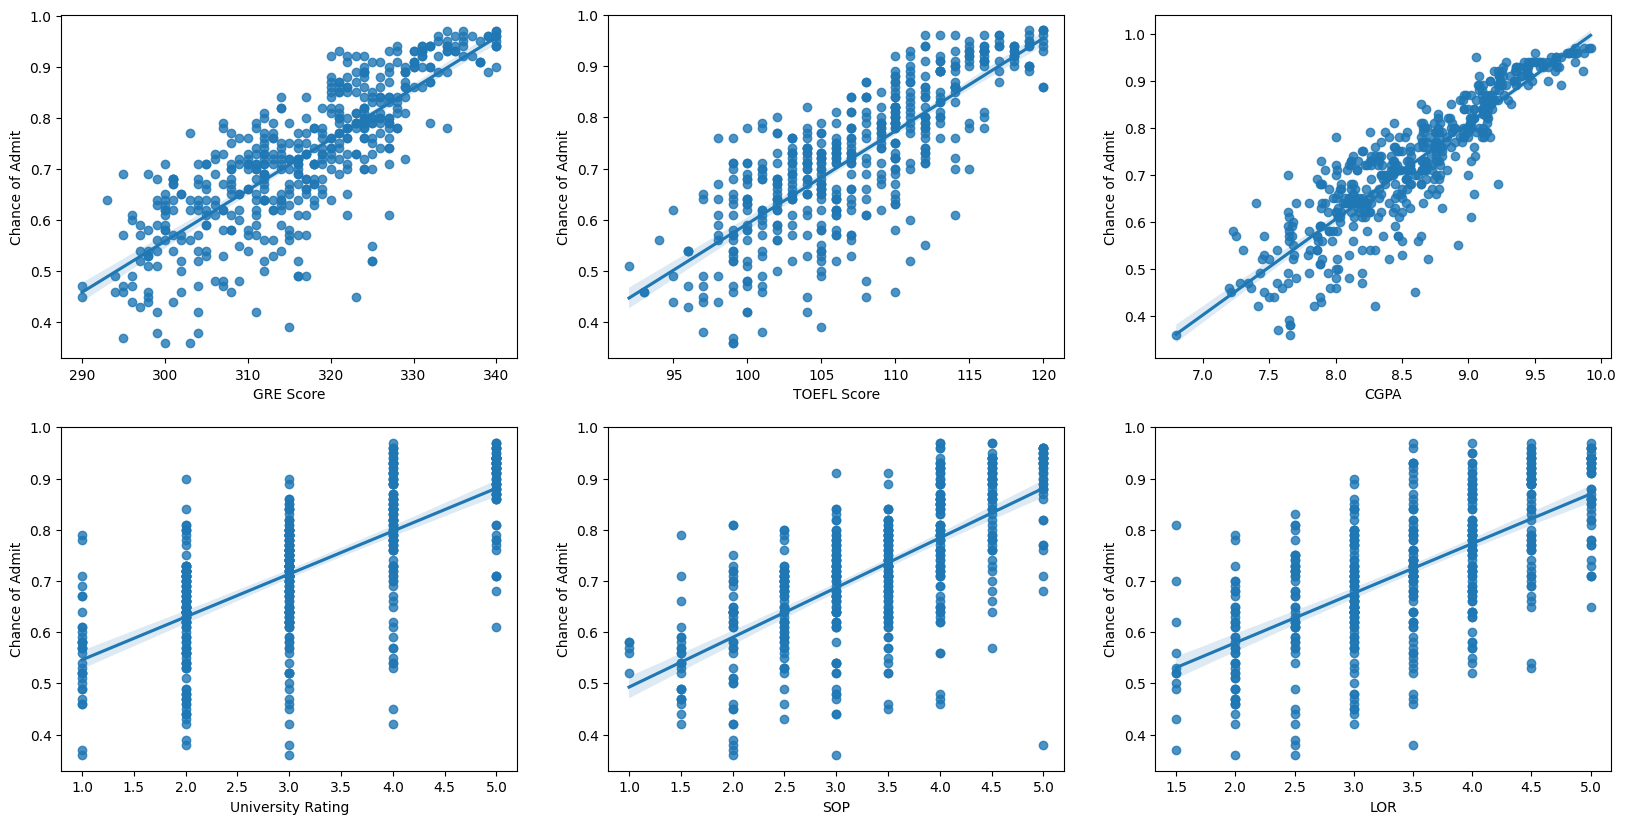

In [ ]:
cols=['GRE Score','TOEFL Score','CGPA', 'University Rating','SOP','LOR', 'Research']

f,a=plt.subplots(nrows=2, ncols=3, figsize=(20,4))
i=0
f.subplots_adjust(top=2)
for row in range(2):
  for col in range(3):
    san.regplot(data=df, x=cols[i], y=y, ax=a[row][col])

    plt.xlabel(cols[i])
    i+=1
plt.show()


Insight: Similar to EDA observation in pairplot.They are linearliy corelated to target.

**Check for multicollinearity and deal with it.**


In [ ]:
scaler = StandardScaler()
X_tr_scaled = scaler.fit_transform(X_train)
X_sm = sm.add_constant(X_tr_scaled)  #Statmodels default is without intercept, to add intercept we need to add constant
sm_model = sm.OLS(y_train, X_sm).fit()
print(sm_model.summary())

                            OLS Regression Results                            
Dep. Variable:        Chance of Admit   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     259.1
Date:                Mon, 18 Sep 2023   Prob (F-statistic):          3.45e-142
Time:                        17:32:53   Log-Likelihood:                 563.24
No. Observations:                 397   AIC:                            -1110.
Df Residuals:                     389   BIC:                            -1079.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7218      0.003    243.091      0.0

**Insight**: OLS Regression result shows that insignificant multicollinearity between featurs.

**Multicollinearity check by VIF score (variables are dropped one-by-one till none has VIF>5)**

In [ ]:
#VIF
vif = pd.DataFrame()
X_t = pd.DataFrame(X_tr_scaled, columns=df.columns)
vif['Features'] = X_t.columns
vif['VIF'] = [variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
5,CGPA,4.68
0,GRE Score,4.33
1,TOEFL Score,3.84
3,SOP,2.77
2,University Rating,2.52
4,LOR,2.06
6,Research,1.56


**Insight:** There is no any value >5 which is considered as the threshhold value for multicollinearity for any features. So can say insignificant multicoliiinearity exists between the features.

**Mean of Residuals**


In [ ]:
Train_RMSE = np.sqrt(mean_squared_error(y_train,y_pred_train))
Test_RMSE = np.sqrt(mean_squared_error(y_test,y_pred_test))
Diff_train_test=Train_RMSE-Test_RMSE
print(Diff_train_test)

0.00031974839903480684


**Insight:** It is clear from RMSE that Mean of Residuals is almost zero, so model is in linear relation.

**Linearity of variables (no pattern in the residual plot)**

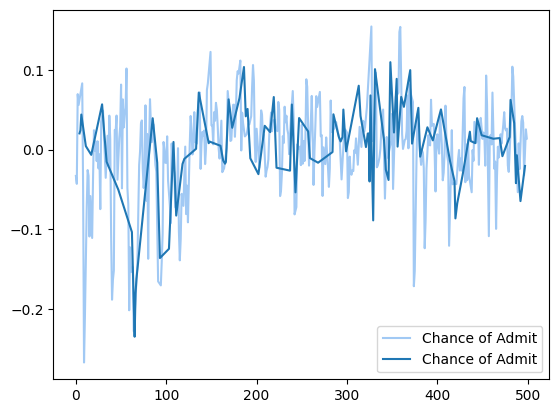

In [ ]:
from sklearn.linear_model import LinearRegression
LinearRegression3 = LinearRegression()
LinearRegression3.fit(X_train,y_train)

y_predictedTrain = LinearRegression3.predict(X_train)
y_predictedTest = LinearRegression3.predict(X_test)

residualsTr = (y_train - y_predictedTrain)
residualsTs = (y_test - y_predictedTest)

san.lineplot(residualsTr, palette='pastel')
san.lineplot(residualsTs)
plt.show()

**Insight:** So there are no patters in the residual of test data and train data.

**Normality of residual:**

<ipython-input-263-462809c7e5ff>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  san.distplot(errors)


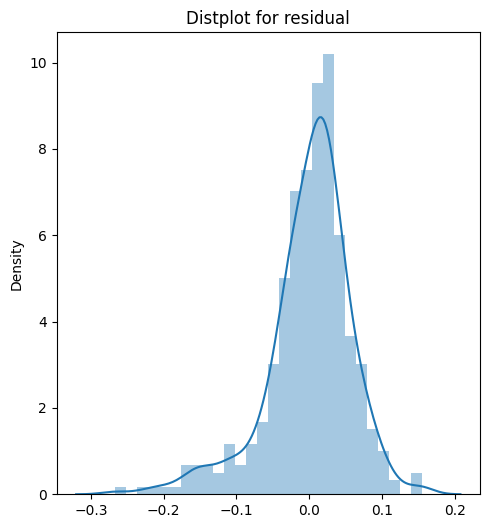

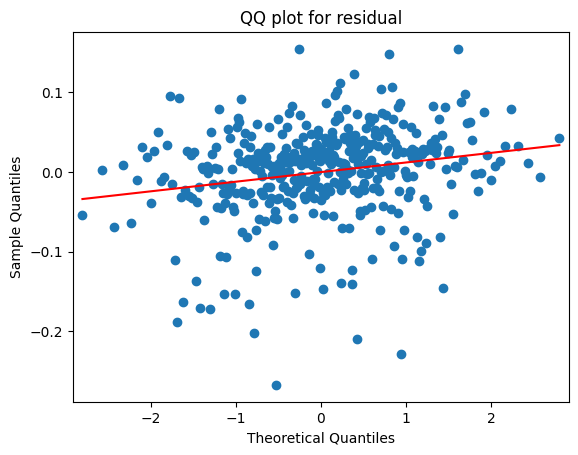

In [ ]:
from sklearn.linear_model import LinearRegression
LinearRegression1 = LinearRegression()
LinearRegression1.fit(X_train,y_train)
Y_hat = LinearRegression1.predict(X_train)
errors =(y_train-Y_hat)
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('Distplot for residual')
san.distplot(errors)
qqplot(errors, line='r')
plt.title('QQ plot for residual')
plt.show()

**Insight:** Through distplot and QQplot its seen that errrors are normally distributed.

**Check for homoscedasticity**

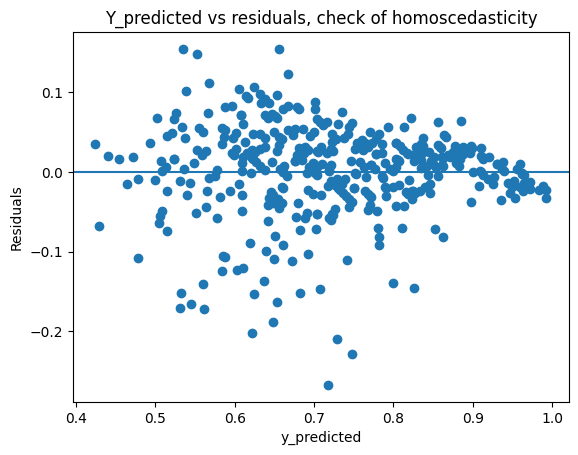

In [ ]:
from sklearn.linear_model import LinearRegression
LinearRegression2 = LinearRegression()
LinearRegression2.fit(X_train,y_train)
y_predicted = LinearRegression2.predict(X_train)
y_predicted.shape
residuals = (y_train - y_predicted)
plt.scatter(y_predicted, residuals)
plt.xlabel('y_predicted')
plt.ylabel('Residuals')
plt.axhline(y=0)
plt.title("Y_predicted vs residuals, check of homoscedasticity")
plt.show()


**Insight:** Since the scatterplot plotting of datapoints is not making any funnal shape, so it is not homoscedastical.

**Recomendations:**

1. Here GRE Score TOEFL Score University Rating SOP(Statement of Purpose(out of 5)) LOR(Letter of Recommendation Strength(out of 5)) CGPA(Undergraduate GPA(out of 10)) Research(Research Experience(either 0 or 1)) are fetures/input and Chance of Admit University Rating (ranging from 0 to 1) is target variable ·
Mean of GRE and TOFL score are 316(92%) and 107(89%) and max is 340 and 120 toal score. Standard Deviation are less as mean value and 50 percentile are almost close for SOP,LOR and CGPA value. Research has also .56 mean value having maximum 1(research experience =yes), doesnt has a big impact.
so, **Seems that high score in GRE and TOFEL has more chance in admission**

2. Both numerically and visually is showed that University rating 3 has highest admission(162) and 5 and 1 ratings has less admission.-Shows normal distribution of data according to university ratings.SOP with 4.0,3.5 and 3.0 has almost double likelihood of getting admission than 2.0 and 5.0 and the least chance of admission is 1.0., shows left skwed distribution. LOR with highest chance of admission at 3.0,4.0,3.5 ratings and 1.0 has the least only. Research experience has a slight higher chance of admission.Based on these visual analysis it can be said that **GRE Score, TOFEL score, CGPA are strongly linearly positively corelated than others**.

3. The most numbers of  GRE score is between 311 to 327.The most nummbers of datapoints have TOFEL score 105 to 107. And the most numbers of data points have CGPA score 8.6 to 8.7. Based on this it can be said that** Average score has more chance and willings of admission**.

4. University rating 5 has higher chance of admit and gradually decreases with least chance with rating 1. similarly SOP and LOR with high point(5) has greater chance than 1.Reearch experience enhance the oppertunity of admission.
continous variables GRE score, TOFEL scoe, CGPA are in positive linearity.

5. The dependent variable(chance of Admit) is increasing with the increase of independent variables(GRE score, TOFEL score, CGPA score.University rating, SOP and LOR has also positively correlated but not very strongly.Research has slight inverse impact on Chance of Admit but more strongly inversely proportion to TOFEL Score, University Rating, SOP, LOR and CGPA. TOFL score and GRE score in positive linearity with each other.

6. **Chance of Admit is strongly dependent on CGPA(0.88%), GRE score(0.81%), TOFEL score(0.79%) **and keep less weightage on University rating(0.69%), SOP(0.68%) and LOR(0.65%). TOFEL score, CGPA and GRE score are strongly relateted to each other.

7. There are no outlier in any other columns except in LOR(1) and Chance of Admit(2), these insignificant percentage of data should drop off , **might be error and can change the prediction**.

8. All the matrix ie. Matrix performances - mean squared error matrix, Resude mean squared error matrix, Resude mean squared error matrix,  r2score matrix, adjusted r2score matrix, gives very close result on train and test data. So **linearregression (line equation)are giving the optimum result**.

9. **Assumption of linearity is proved** by OLS Regression result which shows that** insignificant multicollinearity between featurs**. There is no any value >5 which is considered as the threshhold value for multicollinearity for any features. So can say insignificant multicoliiinearity exists between the features.

10. It is clear from RMSE that **Mean of Residuals is almost zero**, so model is in linear relation.
11. there are **no patters in the residual of test data and train data**.
  Through distplot and QQplot its seen that **errrors are normally distributed**.
  Since the scatterplot plotting of datapoints is not making any funnal shape, so it is** not homoscedastical**.